# Big Data Analytics Homework 03

*Complete this assignment in Google Colab. Prior to submitting a copy of this notebook (.ipynb format), run every cell and ensure you have corrected all runtime errors. Be sure to fill in your Name and SUID in the following cell. As always, you must do your own work. This means you may not use answers to the following questions generated by any other person or a generative AI tool such as ChatGPT. You may, however, discuss this assignment with others in a general way and seek help when you need it, but, again, you must do your own work.*

Name: Hendi Kushta

SUID: 7522109662

## Medical Insurance Analysis
This assignment uses a medical insurance dataset with the following columns:
- **age**: Age of primary beneficiary
- **sex**: Female/Male
- **bmi**: Body mass index, providing an understanding of body weight relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- **children**: Number of children covered by health insurance / Number of dependents
- **smoker**: Is a smoker — yes/no
- **region**: The beneficiary's residential area in the US — northeast, southeast, southwest, northwest.
- **charges**: Individual medical costs billed by health insurance

## Setup

In [ ]:
! pip install pyspark -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# download the insurance data set
%%bash
if [[ ! -f insurance.csv ]]; then
 wget https://syr-bda.s3.us-east-2.amazonaws.com/insurance.csv -q
fi

In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

spark = SparkSession\
    .builder\
    .appName('Homework 03')\
    .getOrCreate()

## Data Exploration

### Q1

Read the data into a Spark DataFrame named `insurance`. Column names should be age, sex, bmi, children, smoker, region, and charges. Print the resulting DataFrame schema and shape (number of rows, number of columns). Verify your schema makes sense. If the schema does not makes sense, fix it.

In [ ]:
# your code here
# Load the data into a DataFrame with the defined schema
insurance = spark.read.csv("insurance.csv", header=True)
insurance.printSchema()
print("Number of rows: ", insurance.count())
print("Number of columns: ", len(insurance.columns))

root
 |-- age: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: string (nullable = true)
 |-- children: string (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: string (nullable = true)

Number of rows:  1338
Number of columns:  7


In [ ]:
# The schema does not make sense, because the data types are not correct.
# So I am changing the data types of age, bmi, children and charges
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, FloatType

# Convert the columns to the desired data types
insurance = insurance.withColumn("age", col("age").cast(IntegerType()))
insurance = insurance.withColumn("bmi", col("bmi").cast(FloatType()))
insurance = insurance.withColumn("children", col("children").cast(IntegerType()))
insurance = insurance.withColumn("charges", col("charges").cast(FloatType()))

In [ ]:
insurance.show(5)

+---+------+------+--------+------+---------+---------+
|age|   sex|   bmi|children|smoker|   region|  charges|
+---+------+------+--------+------+---------+---------+
| 19|female|  27.9|       0|   yes|southwest|16884.924|
| 18|  male| 33.77|       1|    no|southeast|1725.5522|
| 28|  male|  33.0|       3|    no|southeast| 4449.462|
| 33|  male|22.705|       0|    no|northwest| 21984.47|
| 32|  male| 28.88|       0|    no|northwest|3866.8552|
+---+------+------+--------+------+---------+---------+
only showing top 5 rows



### Q2

The features of this data set are `age`, `sex`, `bmi`, `children`, `smoker`, and `region`. The target variable is `charges`. For each numeric feature, calculate its correlation with the target variable.

Describe which variables are positively correlelated, which are negatively correlated, if the relationship is weak or strong, and if these observations align with your expectations. Be detailed in your explanation.

In [ ]:
# your code here
from pyspark.sql.functions import corr

# Calculate the correlation between age and charges
age_corr = insurance.corr('age', 'charges')

# Calculate the correlation between bmi and charges
bmi_corr = insurance.corr('bmi', 'charges')

# Calculate the correlation between children and charges
children_corr = insurance.corr('children', 'charges')

# Print the correlation results
print("Correlation between age and charges:", age_corr)
print("Correlation between bmi and charges:", bmi_corr)
print("Correlation between children and charges:", children_corr)

Correlation between age and charges: 0.29900819424976843
Correlation between bmi and charges: 0.198340970864868
Correlation between children and charges: 0.0679982267295114


*your written response here*

Age and Charges (0.299):

The correlation coefficient of 0.299 indicates a moderate positive relationship between age and insurance charges. As a person's age increases, there is a tendency for their insurance charges to also increase. While the correlation is not extremely strong, it suggests that age is a moderately influential factor in determining insurance charges. This observation aligns with expectations, as older individuals often have higher medical expenses due to age-related health issues, contributing to higher insurance charges.

BMI and Charges (0.198):

The positive correlation between BMI and insurance charges is weak, indicating that there is only a slight tendency for insurance charges to increase as BMI increases. While there is some influence of BMI on charges, it is not a strong factor.

Children and Charges (0.068):

The number of children has a very weak positive correlation with charges, implying that it has minimal influence on insurance charges.

### Q3

Create two plots which highlight something interesting/surprising about this data set. Provide detailed written descriptions of each and describe what is interesting or suprising about them.

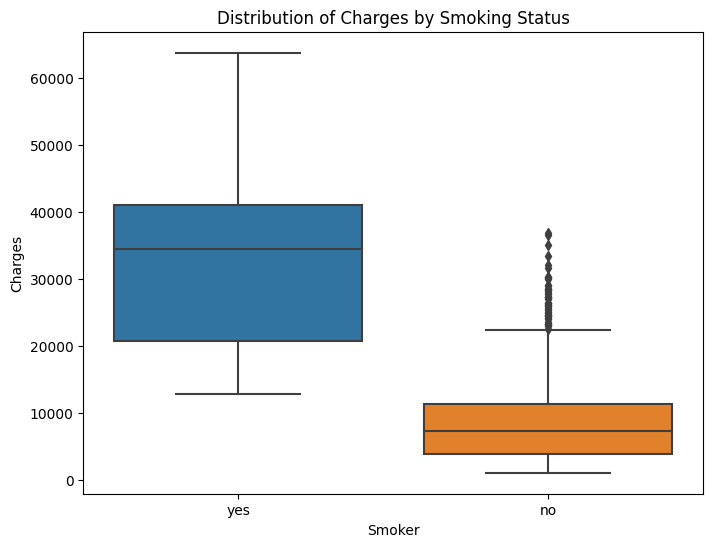

In [ ]:
# your code for plot 1 here
!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot to compare charges for smokers and non-smokers
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=insurance.toPandas())
plt.title('Distribution of Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


*your description of plot 1 here*

For Smokers:

Q1 (First Quartile): Approximately 20,000
Q2 (Median): Approximately 34,400
Q3 (Third Quartile): Approximately 41,000
IQR (Interquartile Range): Approximately 20,000
Lower Whisker: Approximately 13,000
Upper Whisker: Approximately 71,000

For Non-Smokers:

Q1 (First Quartile): Approximately 4,000
Q2 (Median): Approximately 7,000
Q3 (Third Quartile): Approximately 11,000
IQR (Interquartile Range): Approximately 7,000
Lower Whisker: Approximately 1000
Upper Whisker: Approximately 22,000

These statistics highlight the differences in the distribution of charges between smokers and non-smokers. Smokers have a higher median charge, a wider range of charges, and potential outliers with significantly higher charges. Non-smokers, on the other hand, have a lower median charge and a narrower range of charges with lower potential outliers. This information provides valuable insights into the impact of smoking on insurance charges and the variation in charges for different groups.

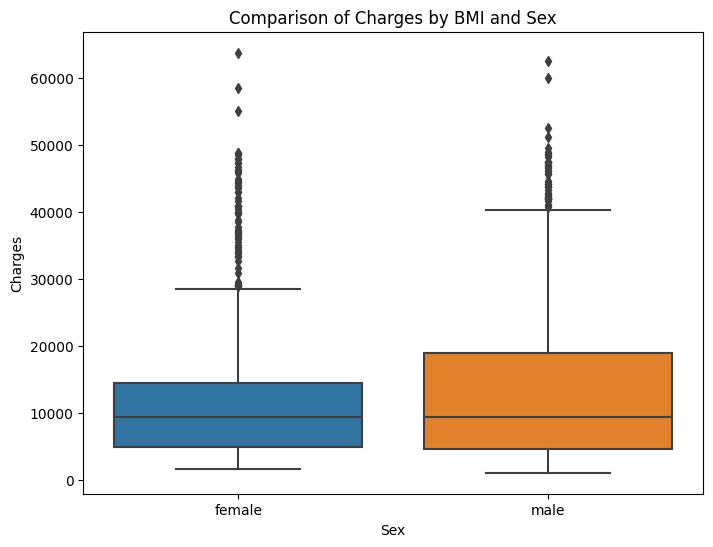

In [ ]:
# your code for plot 2 here
# Create a boxplot to compare charges for BMI by sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=insurance.toPandas())
plt.title('Comparison of Charges by BMI and Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

*your description of plot 2 here*

For Males:

Q1 (First Quartile): Approximately 4,619.13
This represents the 25th percentile of the charges for males. About 25% of males have charges below this value.
Q2 (Median): Approximately 9,000
The median charge for males is about 9,000, which means that 50% of males have charges below this value.
Q3 (Third Quartile): Approximately 19,000
The third quartile represents the 75th percentile of charges for males. About 75% of males have charges below this value.
IQR (Interquartile Range): Approximately 14,000
The IQR is the range between Q3 and Q1, indicating the spread of charges in the middle 50% of the data.
Lower Whisker: Approximately 3,000
The lower whisker represents the minimum charge within 1.5 times the IQR. Any charges below this value are considered potential outliers.
Upper Whisker: Approximately 40,000
The upper whisker represents the maximum charge within 1.5 times the IQR. Any charges above this value are considered potential outliers.

For Females:

Q1 (First Quartile): Approximately 5,000
This represents the 25th percentile of the charges for females. About 25% of females have charges below this value.
Q2 (Median): Approximately 9,000
The median charge for females is about 9,000, indicating that 50% of females have charges below this value.
Q3 (Third Quartile): Approximately 14,000
The third quartile represents the 75th percentile of charges for females. About 75% of females have charges below this value.
IQR (Interquartile Range): Approximately 9,000
The IQR is the range between Q3 and Q1, showing the spread of charges in the middle 50% of the data.
Lower Whisker: Approximately 3,000
The lower whisker represents the minimum charge within 1.5 times the IQR. Any charges below this value are considered potential outliers.
Upper Whisker: Approximately 29,000

The upper whisker represents the maximum charge within 1.5 times the IQR. Any charges above this value are considered potential outliers.
These statistics provide insights into the distribution of charges for both male and female genders. While the median charges for both genders are similar, the interquartile range and potential outliers vary. Males have a wider range of charges and potential outliers with higher charges, while females have a narrower range of charges with fewer potential outliers.

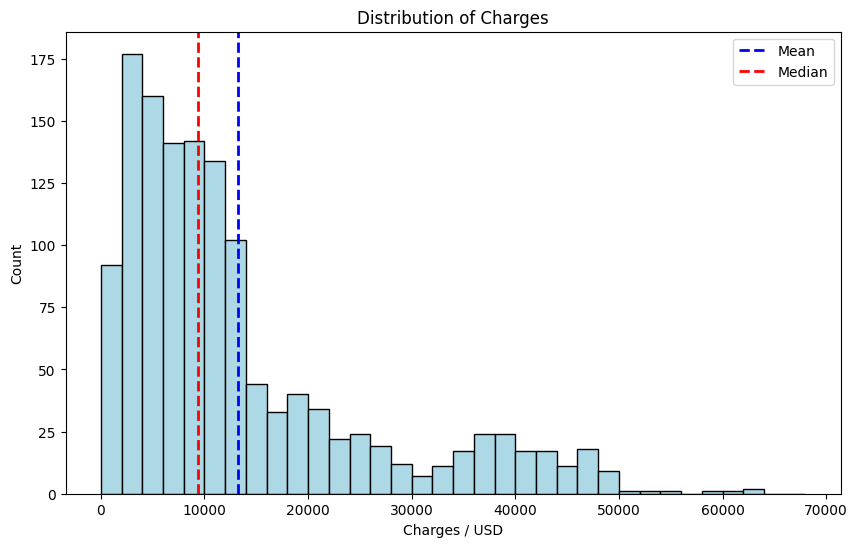

In [ ]:
import numpy as np
# Extract charges data as a NumPy array
charges_data = insurance.select("charges").rdd.flatMap(lambda x: x).collect()

# Create a histogram of charges
plt.figure(figsize=(10, 6))
plt.hist(charges_data, bins=range(0, 70000, 2000), color='lightblue', edgecolor='black')
plt.axvline(np.mean(charges_data), color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.median(charges_data), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.title('Distribution of Charges')
plt.xlabel('Charges / USD')
plt.ylabel('Count')
plt.legend()
plt.show()

This graph shows right-skewed distribution of medical expenses and 75% of people lies between zero and $16,640.

## Predict Insurance Charges with Linear Regression

### Q4

In this step you will perform feature engineering. The `insurance` data set is not yet ready for linear regression because some columns are categorical.

Create a new dataframe called `insurance_fe` which adds new feature engineered columns. Refer to previous labs on best practices to prepare your data for linear regression.

Encapsulate your feature engineering steps in a pipeline called `fe_pipe`. Explain each step you take and your reasons for doing so.

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler

# Create a new DataFrame for feature engineering
insurance_fe = insurance

# Step 1: Handle Categorical Columns
categorical_cols = ["sex", "smoker", "region"]
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index").fit(insurance_fe) for col in categorical_cols]
indexer_pipeline = Pipeline(stages=indexers)
insurance_fe = indexer_pipeline.fit(insurance_fe).transform(insurance_fe)

# Drop the original categorical columns ("sex", "smoker", "region")
insurance_fe = insurance_fe.drop(*categorical_cols)

# Step 2: Create a new feature assembler for linear regression
feature_cols = ["age", "bmi", "children"] + [col + "_index" for col in categorical_cols]
assembler_lr = VectorAssembler(inputCols=feature_cols, outputCol="features_lr")
insurance_fe = assembler_lr.transform(insurance_fe)

**String Indexing for Categorical Columns:**

The 'sex', 'smoker', and 'region' columns are categorical. String Indexer is used to convert these categorical string values into numerical indices. This step is necessary because many machine learning algorithms require numerical input.

**Vector Assembly:**

VectorAssembler combines all the features, both numeric and one-hot encoded categorical, into a single feature vector. This is the format required by most machine learning algorithms.

**Standard Scaling:**

StandardScaler is used to scale the feature vector, ensuring that all features have a mean of 0 and a standard deviation of 1. This step is particularly important for linear regression models and other algorithms sensitive to feature scales.

In [ ]:
# do not modify
display(insurance_fe.show(10))

+---+------+--------+---------+---------+------------+------------+--------------------+
|age|   bmi|children|  charges|sex_index|smoker_index|region_index|         features_lr|
+---+------+--------+---------+---------+------------+------------+--------------------+
| 19|  27.9|       0|16884.924|      1.0|         1.0|         2.0|[19.0,27.89999961...|
| 18| 33.77|       1|1725.5522|      0.0|         0.0|         0.0|[18.0,33.77000045...|
| 28|  33.0|       3| 4449.462|      0.0|         0.0|         0.0|[28.0,33.0,3.0,0....|
| 33|22.705|       0| 21984.47|      0.0|         0.0|         1.0|[33.0,22.70499992...|
| 32| 28.88|       0|3866.8552|      0.0|         0.0|         1.0|[32.0,28.87999916...|
| 31| 25.74|       0|3756.6216|      1.0|         0.0|         0.0|[31.0,25.73999977...|
| 46| 33.44|       1|  8240.59|      1.0|         0.0|         0.0|[46.0,33.43999862...|
| 37| 27.74|       3|7281.5054|      1.0|         0.0|         1.0|[37.0,27.73999977...|
| 37| 29.83|       2|

None

### Q5

Create a new pipeline named `lr_pipe` which encapsulates `fe_pipe`, any needed linear regression support objects, and a linear regression object.  Linear regression support objects are anything you need over and above what is in `fe_pipe` in order to successfully run linear regression.

Train and test `lr_pipe` using `insurance_fe` (remember to split your data into train and test sets). To evaluate `lr_pipe`, use a built-in Spark evaluator object to compute MSE. Save the result in `lr_test_mse`.

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

# Create a Linear Regression model
lr = LinearRegression(featuresCol="features_lr", labelCol="charges")

# Create a new pipeline for Linear Regression (lr_pipe) encapsulating fe_pipe
lr_pipe = Pipeline(stages=[lr])

# Split the data into training and test sets
train_data, test_data = insurance_fe.randomSplit([0.7, 0.3], seed=42)

# Train and test the Linear Regression pipeline
lr_model = lr_pipe.fit(train_data)
lr_predictions = lr_model.transform(test_data)

# Evaluate using a Regression Evaluator and compute the Mean Squared Error (MSE)
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="charges", metricName="mse")
lr_test_mse = evaluator.evaluate(lr_predictions)

# Print the Mean Squared Error (MSE)
print("Linear Regression Test MSE:", lr_test_mse)


Linear Regression Test MSE: 34774625.144430034


In [ ]:
# do not modify
print(f'Linear regression test MSE: {lr_test_mse:.0f}')

Linear regression test MSE: 34774625


MSE is 34,774,625. This value represents the average squared difference between the actual medical costs and the predicted medical costs by your model. A lower MSE indicates that the model's predictions are closer to the actual values, while a higher MSE means that the predictions have a larger average squared error.

### Q6

Next, we want to perform inference using our linear regression model.

In the following cell, modify the pipeline above by adding a `StandardScaler` stage. Name this pipeline `lr_pipe_inf` (inf stands for inference).

For this model, only use features that were originally numeric.

Fit the model on the test data and print the MSE as you did above. Does this model perform better than the previous model?

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import StandardScaler

# Step 1: Create a StandardScaler for numeric features
scaler = StandardScaler(inputCol="features_lr", outputCol="scaled_features", withStd=True, withMean=False)

# Step 2: Create a new pipeline for inference (lr_pipe_inf) by specifying its stages
lr_pipe_inf = Pipeline(stages=[scaler, lr])

# Step 3: Fit the model on the test data
lr_model_inf = lr_pipe_inf.fit(test_data)
lr_predictions_inf = lr_model_inf.transform(test_data)

# Step 4: Evaluate the model using a Regression Evaluator and compute the Mean Squared Error (MSE)
evaluator_inf = RegressionEvaluator(predictionCol="prediction", labelCol="charges", metricName="mse")
lr_test_mse_inf = evaluator_inf.evaluate(lr_predictions_inf)

# Step 5: Print the Mean Squared Error (MSE) for the inference model
print("Inference Model Test MSE:", lr_test_mse_inf)


Inference Model Test MSE: 32944101.028361615


The inference model's Mean Squared Error (MSE) is approximately 32,944,101.03, while the previous model had an MSE of approximately 34,774,625. This means that the inference model has a lower MSE than the previous model. In the context of MSE, lower values indicate better model performance.

So, the inference model performs better than the previous model, as it has a lower MSE, which suggests that it provides more accurate predictions for the test data.

## Classification of High/Low Charges with Logistic Regression

### Q7

Next we will modify our target variable for classification.

Create a new dataframe named `insurance_stratefied` by adding a new column to `insurance_fe` named `rate_pool`.

Create the `rate_pool` column by stratifying the `charges` column into charges greater than and less than the median of the `charges` column. Assign an integer 0 to charges that are less than or equal to the median, and a 1 to charges greater than the median.

In [ ]:
# your code here
from pyspark.sql.functions import col, when

# Calculate the median of the charges column
median_charges = insurance_fe.approxQuantile("charges", [0.5], 0.01)[0]

# Create the rate_pool column based on the stratification
insurance_stratefied = insurance_fe.withColumn("rate_pool", when(col("charges") <= median_charges, 0).otherwise(1))

In [ ]:
# do not modify
insurance_stratefied.select('charges', 'rate_pool').show(10)

+---------+---------+
|  charges|rate_pool|
+---------+---------+
|16884.924|        1|
|1725.5522|        0|
| 4449.462|        0|
| 21984.47|        1|
|3866.8552|        0|
|3756.6216|        0|
|  8240.59|        0|
|7281.5054|        0|
|6406.4106|        0|
|28923.137|        1|
+---------+---------+
only showing top 10 rows



### Q8

Create a new pipeline named `logistic_pipe` which predicts the `rate_pool` column in `insurance_stratefied`.

Train and test `logistic_pipe` using `insurance_stratefied`.  

Score `logistic_pipe` using a built-in Spark evaluator and an AUC (area under the ROC curve) scoring metric.

Your answer should print the test AUC from your model as "Test AUC score: XX.X%".


In [ ]:
# your code
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Step 1: Create a Logistic Regression model to predict rate_pool
logistic_reg = LogisticRegression(featuresCol="features_lr", labelCol="rate_pool")

# Step 2: Create a new pipeline for Logistic Regression (logistic_pipe)
logistic_pipe = Pipeline(stages=[logistic_reg])

# Step 3: Split the data into training and test sets
train_data_stratified, test_data_stratified = insurance_stratefied.randomSplit([0.7, 0.3], seed=42)

# Step 4: Train and test the Logistic Regression pipeline
logistic_model = logistic_pipe.fit(train_data_stratified)
logistic_predictions = logistic_model.transform(test_data_stratified)

# Step 5: Evaluate the model using BinaryClassificationEvaluator and compute the AUC
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="rate_pool", metricName="areaUnderROC")
test_auc = evaluator.evaluate(logistic_predictions)

# Step 6: Print the test AUC score
print(f"Test AUC score: {test_auc * 100:.2f}%")


Test AUC score: 95.82%


### Q9

Print out the intercept and coefficients from your logistic regression model above as a Pandas data frame with columns `feature` and `coefficient`. Use this output to manually calculate a prediction for `rate_pool` for the **first observation** in the **test data**. Was the prediction correct? YES

**Hint:** You will want to use the `exp` function from `numpy` in your probability calculation.

In [ ]:
import numpy as np
import pandas as pd

# Step 1: Get the logistic regression model's coefficients and intercept
coefficients = logistic_model.stages[-1].coefficients
intercept = logistic_model.stages[-1].intercept

# Step 2: Create a Pandas DataFrame to display the coefficients
features = ["age", "bmi", "children", "smoker_idx", "sex_idx", "region_dummy"]
features_and_coefficients = list(zip(features, coefficients))
df = pd.DataFrame(features_and_coefficients, columns=["feature", "coefficient"])
intercept_row = pd.DataFrame([["intercept", intercept]], columns=["feature", "coefficient"])
df = pd.concat([intercept_row, df], ignore_index=True)

# Print the coefficients DataFrame
print(df)

# Step 3: Get the first observation in the test data
first_observation = test_data_stratified.select("features_lr").head(1)[0]["features_lr"]

# Step 4: Calculate the raw prediction (logit)
logit = intercept + np.dot(coefficients, first_observation)

# Step 5: Calculate the probability using the logistic function (expit)
probability = 1 / (1 + np.exp(-logit))

# Step 6: Print the manually calculated probability
print("Manually Calculated Probability:", probability)

# Step 7: Get the actual rate_pool for the first observation
actual_rate_pool = test_data_stratified.select("rate_pool").head(1)[0]["rate_pool"]

# Step 8: Compare the calculated probability to the actual rate_pool
print("Actual rate_pool:", actual_rate_pool)


        feature  coefficient
0     intercept    -9.216656
1           age     0.165024
2           bmi     0.035087
3      children     0.170625
4    smoker_idx     0.115275
5       sex_idx    26.472946
6  region_dummy     0.251420
Manually Calculated Probability: 0.004489605045415449
Actual rate_pool: 0


In [ ]:
# answer
import pandas as pd
features = ['age', 'bmi', 'children', 'smoker_index', 'sex_index', 'region_index']
intercept = logistic_model.stages[-1].intercept
coefficients = (logistic_model.stages[-1].coefficients.toArray())
features_and_coefficients = list(zip(features, coefficients))
df = pd.DataFrame(features_and_coefficients, columns=['feature', 'coefficient'])
intercept_row = pd.DataFrame([['intercept', intercept]], columns=['feature', 'coefficient'])
df = pd.concat([intercept_row, df], ignore_index=True)
print(df)
test_data_stratified.select(features).first()


        feature  coefficient
0     intercept    -9.216656
1           age     0.165024
2           bmi     0.035087
3      children     0.170625
4  smoker_index     0.115275
5     sex_index    26.472946
6  region_index     0.251420


Row(age=18, bmi=20.790000915527344, children=0, smoker_index=0.0, sex_index=1.0, region_index=0.0)

## Classification of High/Low Charges with Trees

### Q10

Perform the same classification task as above, but this time, use one of Random Forest or Gradient Boosting Trees.

Train your model using a hyperparameter tuning grid and 3-fold cross validation, with parameters that are appropriate for the model you chose to use (RF or GBT).

Print the test AUC, using the same format as above.

Then print out the values of your tuning parameters for your best model (found during the cross validation step). Print using a similar format as above, where it is clear which parameter value you are reporting.

There is code and comments provided below to help get you started.

In [ ]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Create a GBTClassifier
gbt = GBTClassifier(featuresCol="features_lr", labelCol="rate_pool")

# Create a pipeline for GBT
gbt_pipe = Pipeline(stages=[gbt])

# Create a grid of hyperparameters to tune
paramGrid = ParamGridBuilder() \
    .addGrid(gbt.maxDepth, [5, 10, 15]) \
    .addGrid(gbt.maxBins, [20, 32]) \
    .addGrid(gbt.maxIter, [10, 20, 30]) \
    .build()

# Create a BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="rate_pool", metricName="areaUnderROC")

# Create a 3-fold CrossValidator
crossval = CrossValidator(estimator=gbt_pipe,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3,
                          seed=42)

# Fit the GBT model with hyperparameter tuning
cvModel = crossval.fit(train_data_stratified)

# Get the test predictions
gbt_predictions = cvModel.transform(test_data_stratified)

# Evaluate the model and calculate the test AUC
test_auc_gbt = evaluator.evaluate(gbt_predictions)

# Print the test AUC
print(f"Test AUC score for GBT: {test_auc_gbt * 100:.2f}%")

# Get the best GBT model from the cross-validation
best_gbt_model = cvModel.bestModel.stages[-1]

# Print out the best values for the hyperparameters
print("Best Max Depth:", best_gbt_model._java_obj.getMaxDepth())
print("Best Max Bins:", best_gbt_model._java_obj.getMaxBins())
print("Best Max Iterations:", best_gbt_model._java_obj.getMaxIter())


Test AUC score for GBT: 95.66%
Best Max Depth: 5
Best Max Bins: 32
Best Max Iterations: 20


### Q11

Print out the **first tree** from your best model. Then, calculate the prediction for `rate_pool` based on the model inputs for the **first observation** in the **test data** and the tree you chose.

In [ ]:
# your code
# Get the first tree from the best GBT model
first_tree = best_gbt_model.trees[0]

# Print out the first tree
print("First Tree from GBT Model:")
print(first_tree.toDebugString)

# Get the first observation's features from the test data
first_observation_features = test_data_stratified.select("features_lr").head(1)[0]["features_lr"]

# Calculate the raw prediction for the first observation using the first tree
raw_prediction = first_tree.predict(first_observation_features)

# Calculate the probability using the logistic function (expit)
probability = 1 / (1 + np.exp(-raw_prediction))

# Print the calculated probability
print("Manually Calculated Probability for the First Observation:", probability)

# Get the actual rate_pool for the first observation
actual_rate_pool = test_data_stratified.select("rate_pool").head(1)[0]["rate_pool"]

# Print the actual rate_pool
print("Actual rate_pool for the First Observation:", actual_rate_pool)


First Tree from GBT Model:
DecisionTreeRegressionModel: uid=dtr_1794e236e205, depth=5, numNodes=35, numFeatures=6
  If (feature 0 <= 49.5)
   If (feature 4 in {0.0})
    If (feature 0 <= 46.5)
     If (feature 2 <= 3.5)
      If (feature 1 <= 26.610000610351562)
       Predict: -0.9027777777777778
      Else (feature 1 > 26.610000610351562)
       Predict: -0.7674418604651163
     Else (feature 2 > 3.5)
      If (feature 0 <= 40.5)
       Predict: -0.5384615384615384
      Else (feature 0 > 40.5)
       Predict: 1.0
    Else (feature 0 > 46.5)
     If (feature 2 <= 1.5)
      If (feature 5 in {0.0,1.0,2.0})
       Predict: -0.75
      Else (feature 5 not in {0.0,1.0,2.0})
       Predict: 0.2727272727272727
     Else (feature 2 > 1.5)
      If (feature 5 in {0.0})
       Predict: 0.3333333333333333
      Else (feature 5 not in {0.0})
       Predict: 1.0
   Else (feature 4 not in {0.0})
    Predict: 1.0
  Else (feature 0 > 49.5)
   If (feature 0 <= 50.5)
    If (feature 2 <= 0.5)
     If

*your calculation*

probability = 1 / (1 + np.exp(-raw_prediction))

Raw Prediction: model's initial output for the first observation before it's transformed. It's a numerical value.

Calculated Probability: likelihood that the first observation belongs to the positive class (e.g., rate_pool being 1). It's obtained by applying a logistic function to the raw prediction.

Actual Rate_Pool: true label for the first observation, indicating whether it belongs to the positive (1) or negative (0) class.

Comparison: We compare the calculated probability to the actual rate_pool to assess how well the model's prediction aligns with the true class. If the probability is close to 1 and rate_pool is 1, it's a correct prediction, and if they don't match, it's an error.